# Welcome to our Play-Doh Hackathon!

### 1. Start by getting a clone of the Github repository

In [1]:
!pwd

/home/jupyter-hannahloly/ME121-25/Jupyter/Hackathon_Testing


In [3]:
!git clone https://github.com/tuftsceeo/UR_summer2025.git

fatal: destination path 'UR_summer2025' already exists and is not an empty directory.


#### The goal: Roll a slab of play-doh and draw something using a pizza cutter and the UR Arm. (Run code block below) 

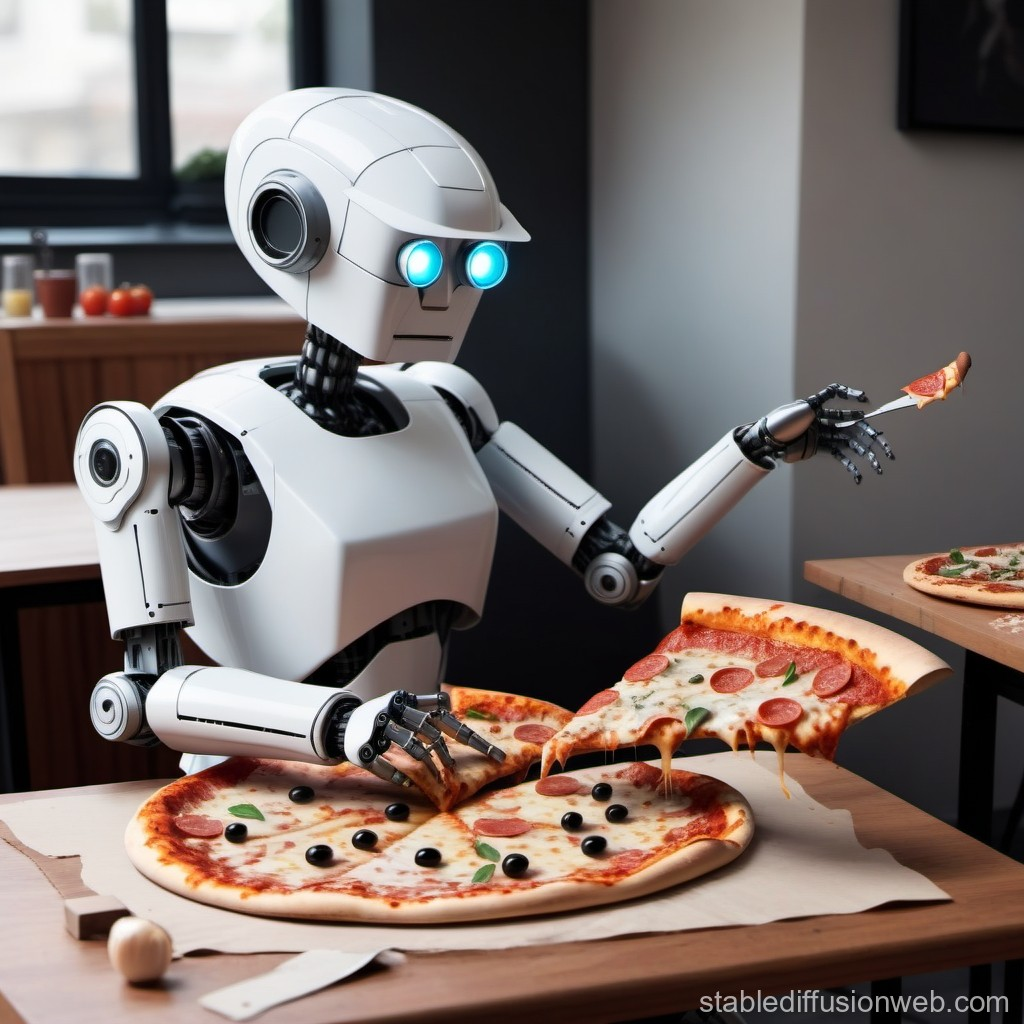

In [1]:
from IPython.display import Image, display

# Replace with your image path
image_path = "../UR_summer2025/robot_pizza.jpg"

display(Image(filename=image_path, width=300))

### 2. Once you have the libraries locally, initialize the functions.

In [1]:
from myur import MyUR3e
import sys
sys.path.append("/home/jupyter-hannahloly/ME121-25/Jupyter/UR_summer2025") # change this to be local path
import UR_lib 
import time
import numpy as np

# Test path
coordinates_path = [[0,0,0,0,0,0],
                    [3,4,1,30,0,0],
                    [6,8,2,90,20,0],
                    [6,8,2,90,20,20]]

# Create an instance of the MyUR3e class
robot = MyUR3e()
print("done")

done


### 3. Establish boundaries

In [4]:
robot.read_global_pos() # outputs [x,y,z,rx,ry,rz]

# acrylic is roughly x: (.16, .28); y: (-.1, .15); z ~ .2


[0.24999895691871643,
 -0.10000097006559372,
 0.20999445021152496,
 0.0994563812066073,
 0.09819299974879857,
 0.10007132927496416]

### 4. Move the robot! 

In [3]:
# move global
robot.move_global(
                [.25, -.10, 0.21, 0.0, 0.0, 0.0],
                time=5,
                degrees=True,
                vis_only=False,
                wait=True,
                interp=None,
)
print("done")

[INFO] [1750775824.848419174] [remote_control_client]: Goal #1: Executing


done


[INFO] [1750775829.855112334] [remote_control_client]: Goal #1: Completed


In [13]:
# gripper commands
robot.move_gripper(80) # 100 = Close, 0 = Open, 95 = Coil tool 
print("done")

done


In [49]:
# Move in a 10cm square using relative commands
relative_trajectory = [
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.1, 0.0, 0.0, 0.0, 0.0],
    [-0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, -0.1, 0.0, 0.0, 0.0, 0.0],
]
start_pos = [0.2, -0.1, 0.2, 0.0, 0.0, 0.0]
robot.move_global(start_pos)
global_trajectory = UR_lib.relative_to_global(relative_trajectory, start_pos) # converts relative to global
global_trajectory = UR_lib.linear_interp(global_trajectory, debugging=False, aligned=False) # Linear interpretation
# Move the end effector through the trajectory
robot.move_global(global_trajectory, (len(global_trajectory)/2))
print("done")

[INFO] [1750775504.270038238] [remote_control_client]: Goal #40: Executing
[INFO] [1750775509.374458963] [remote_control_client]: Goal #40: Completed
[INFO] [1750775509.445635202] [remote_control_client]: Goal #41: Executing


done


[INFO] [1750775535.003849286] [remote_control_client]: Goal #41: Completed


In [3]:
# Draw Circles

center = [0.25, 0.1, 0.34, 0.0, 0.0, 0.0]
robot.move_global(center)
print("make sure center position seems viable.")
time.sleep(5)
trajectory = UR_lib.draw_circle(center, radius=0.1, plane_rotation=[0, 0, 0], debugging=False, aligned=False)
robot.move_global(trajectory, len(trajectory)/2)
print("done")

[INFO] [1750776505.010474372] [remote_control_client]: Goal #2: Executing


make sure center position seems viable.


[INFO] [1750776510.064750346] [remote_control_client]: Goal #2: Completed
[INFO] [1750776515.127961788] [remote_control_client]: Goal #3: Executing


done


[INFO] [1750776538.183561431] [remote_control_client]: Goal #3: Completed
